<a href="https://colab.research.google.com/github/PATELOM925/Automated_Sleep_Staging_Techniques/blob/main/4CLASS_40_SUBJECTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.cuda.is_available():
    print('CUDA-enabled GPU found.')
else:
    print('No GPU found. Training will be carried out on CPU, which might be '
          'slower.\n\nIf running on Google Colab, you can request a GPU runtime by'
          ' clicking\n`Runtime/Change runtime type` in the top bar menu, then '
          'selecting \'GPU\'\nunder \'Hardware accelerator\'.')


No GPU found. Training will be carried out on CPU, which might be slower.

If running on Google Colab, you can request a GPU runtime by clicking
`Runtime/Change runtime type` in the top bar menu, then selecting 'GPU'
under 'Hardware accelerator'.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install mne
!pip install torch
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl

In [4]:
import os
import copy
import mne
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



# enable GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# /root/mne_data
# /root/mne_data/physionet-sleep-data

In [6]:

import mne
from mne.datasets.sleep_physionet.age import fetch_data

subjects, recordings = range(83), [1, 2]

fnames = fetch_data(subjects=subjects, recording=recordings, on_missing='warn')
mne.set_log_level('ERROR')  # To avoid flooding the cell outputs with messages

Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data


<ipython-input-6-95b456395efa>:6: RuntimeWarning: This dataset contains subjects 0 to 82 with missing subjects [39, 68, 69, 78, 79]. Unknown subjects: 39, 68, 69, 78, 79.
  fnames = fetch_data(subjects=subjects, recording=recordings, on_missing='warn')
<ipython-input-6-95b456395efa>:6: RuntimeWarning: Requested recording 1 for subject 36 and/or 52, but it is not available in corpus.
  fnames = fetch_data(subjects=subjects, recording=recordings, on_missing='warn')
<ipython-input-6-95b456395efa>:6: RuntimeWarning: Requested recording 2 for subject 13, but it is not available in corpus.
  fnames = fetch_data(subjects=subjects, recording=recordings, on_missing='warn')
100%|█████████████████████████████████████| 48.3M/48.3M [00:00<00:00, 17.0GB/s]
100%|█████████████████████████████████████| 4.62k/4.62k [00:00<00:00, 1.62MB/s]
100%|█████████████████████████████████████| 51.6M/51.6M [00:00<00:00, 16.4GB/s]
100%|█████████████████████████████████████| 4.58k/4.58k [00:00<00:00, 1.66MB/s]
100%|██

Download complete in 03h20m21s (7244.6 MB)


In [10]:
for psg_file, hypnogram_file in fnames:
    if os.path.exists(psg_file):
        print(f"{psg_file} exists.")
    else:
        print(f"{psg_file} does not exist.")

    if os.path.exists(hypnogram_file):
        print(f"{hypnogram_file} exists.")
    else:
        print(f"{hypnogram_file} does not exist.")

/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001E0-PSG.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001EC-Hypnogram.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002E0-PSG.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002EC-Hypnogram.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4011E0-PSG.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4011EH-Hypnogram.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4012E0-PSG.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4012EC-Hypnogram.edf does not exist.
/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4021E0-PSG.edf does not exist.
/con

In [26]:
fnames = [
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4011E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4011EH-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4012E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4012EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4021E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4021EH-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4022E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4022EJ-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4031E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4031EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4032E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4032EP-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4041E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4041EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4042E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4042EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4051E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4051EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4052E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4052EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4061E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4061EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4062E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4062EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4071E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4071EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4072E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4072EH-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4081E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4081EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4082E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4082EP-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4091E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4091EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4092E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4092EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4101E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4101EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4102E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4102EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4111E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4111EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4112E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4112EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4121E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4121EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4122E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4122EV-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4131E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4131EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4141E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4141EU-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4142E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4142EU-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4151E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4151EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4152E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4152EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4161E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4161EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4162E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4162EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4171E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4171EU-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4172E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4172EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4181E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4181EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4182E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4182EC-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4191E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4191EP-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4192E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4192EV-Hypnogram.edf'),
    ('/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4201E0-PSG.edf', '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4201EC-Hypnogram.edf')
]


In [27]:
old = '/content/drive/MyDrive/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/'
new = '/root/mne_data/physionet-sleep-data/'


def change_path(fnames, old, new):
    transformed_fnames = []
    for psg_path, hypnogram_path in fnames:
        new_psg_path = psg_path.replace(old, new)
        new_hypnogram_path = hypnogram_path.replace(old, new)
        transformed_fnames.append((new_psg_path, new_hypnogram_path))
    return transformed_fnames


fnames = change_path(fnames, old, new)
print(fnames)

#Print the transformed paths or save them as needed
for psg_path, hypnogram_path in new_fnames:
    print(psg_path, hypnogram_path)

[('/root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4001EC-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4002E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4002EC-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4011EH-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4012E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4012EC-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4021E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4021EH-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4022E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4022EJ-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4031E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4031EC-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/SC4032E0-PSG.edf', '/root/mne_data/physionet-sleep-data/SC4032EP-Hypnogram.edf'), ('/root/mne_data/physionet-sleep-data/S

In [28]:
import os

def verify_file_paths(fnames):
    for raw_fname, annot_fname in fnames:
        if not os.path.isfile(raw_fname):
            print(f"File not found: {raw_fname}")
        else:
          print(f"File Exists: {raw_fname}")
        if not os.path.isfile(annot_fname):
            print(f"File not found: {annot_fname}")
        else:
          print(f"File Exists: {annot_fname}")

verify_file_paths(fnames)

File Exists: /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4001EC-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4002E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4002EC-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4011EH-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4012E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4012EC-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4021E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4021EH-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4022E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4022EJ-Hypnogram.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4031E0-PSG.edf
File Exists: /root/mne_data/physionet-sleep-data/SC4031EC-Hypnogram.edf
File Exists: /root/mne_data/physio

In [82]:
len(fnames)

40

In [29]:
def load_sleep_physionet_raw(raw_fname, annot_fname, load_eeg_only=True,
                             crop_wake_mins=30):

    mapping = {'EOG horizontal': 'eog',
               'Resp oro-nasal': 'misc',
               'EMG submental': 'misc',
               'Temp rectal': 'misc',
               'Event marker': 'misc'}
    exclude = mapping.keys() if load_eeg_only else ()

    raw = mne.io.read_raw_edf(raw_fname, exclude=exclude)
    annots = mne.read_annotations(annot_fname)
    raw.set_annotations(annots, emit_warning=False)
    if not load_eeg_only:
        raw.set_channel_types(mapping)

    if crop_wake_mins > 0:  # Cut start and end Wake periods
        # Find first and last sleep stages
        mask = [x[-1] in ['1', '2', '3', '4', 'R']
                for x in annots.description]
        sleep_event_inds = np.where(mask)[0]

        # Crop raw
        max_time = (raw.n_times - 1) / raw.info['sfreq']
        #print(max_time)
        tmin = annots[int(sleep_event_inds[0])]['onset'] - \
               crop_wake_mins * 60
        tmax = annots[int(sleep_event_inds[-1])]['onset'] + \
               crop_wake_mins * 60
        if tmin >= 0 and tmax <= max_time:   # data preprocessing removing tmax (%s) which are grater than or equal to the max
            raw.crop(tmin=tmin, tmax=tmax)
        else:
            pass

    # Rename EEG channels
    ch_names = {i: i.replace('EEG ', '')
                for i in raw.ch_names if 'EEG' in i}
    mne.rename_channels(raw.info, ch_names)

    # Save subject and recording information in raw.info
    basename = os.path.basename(raw_fname)
    subj_nb, rec_nb = int(basename[3:5]), int(basename[5])
    raw.info['subject_info'] = {'id': subj_nb, 'rec_id': rec_nb}

    return raw

In [30]:
#data_loading

raws=[load_sleep_physionet_raw(f[0], f[1]) for f in fnames]

In [35]:
raws

[<RawEDF | SC4001E0-PSG.edf, 2 x 2508001 (25080.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4002E0-PSG.edf, 2 x 3348001 (33480.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4011E0-PSG.edf, 2 x 3261001 (32610.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4012E0-PSG.edf, 2 x 3447001 (34470.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4021E0-PSG.edf, 2 x 3060001 (30600.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4022E0-PSG.edf, 2 x 3027001 (30270.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4031E0-PSG.edf, 2 x 2850001 (28500.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4032E0-PSG.edf, 2 x 2706001 (27060.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4041E0-PSG.edf, 2 x 3705001 (37050.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4042E0-PSG.edf, 2 x 3606001 (36060.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4051E0-PSG.edf, 2 x 2010001 (20100.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4052E0-PSG.edf, 2 x 3741001 (37410.0 s), ~8 kB, data not loaded>,
 <RawEDF | SC4061E0-PSG.edf, 2 x 2481001 (24810.0 s)

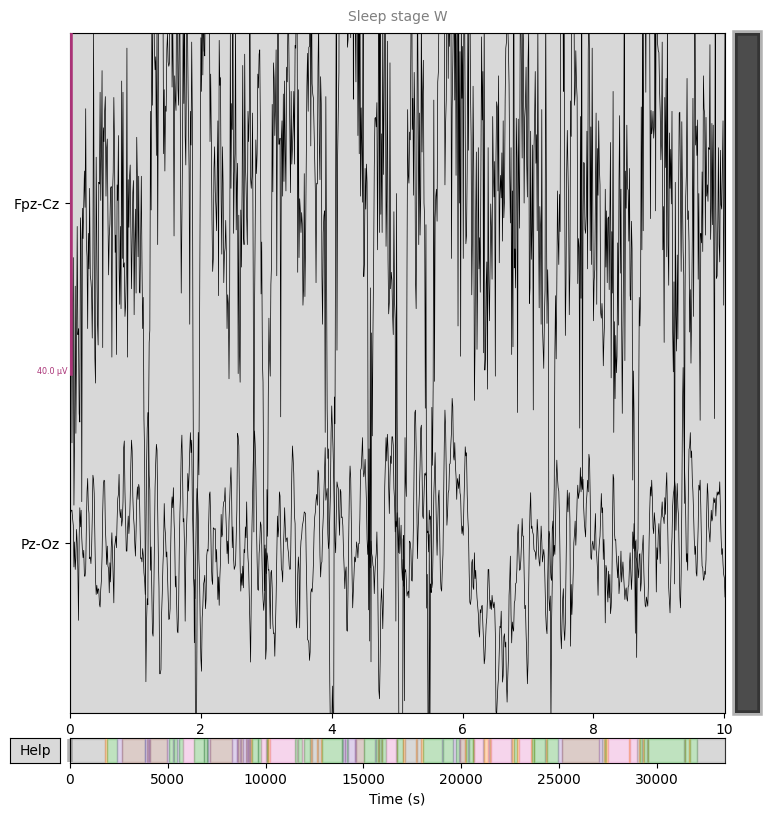

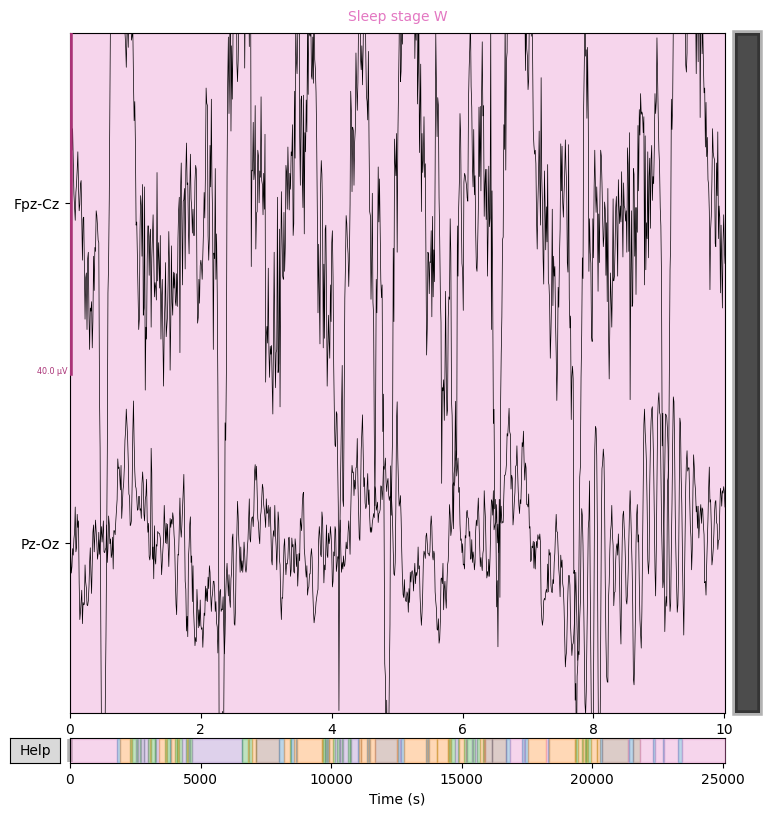

In [36]:
# Plot a recording as a sanity check
raws[1].plot();
raws[0].plot();

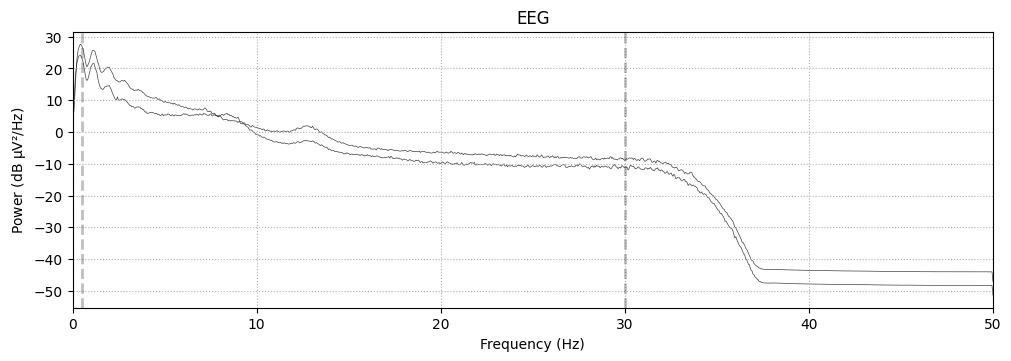

In [37]:
l_freq, h_freq = None, 30

for raw in raws:
    raw.load_data().filter(l_freq, h_freq)  # filtering happens in-place

# Plot the power spectrum of a recording as sanity check
raws[0].plot_psd();

In [40]:
# function to extract 30-s windows
def extract_epochs(raw, chunk_duration=30.):

    annotation_desc_2_event_id = {
        'Sleep stage W': 1,
        'Sleep stage 1': 2,
        'Sleep stage 2': 2,
        'Sleep stage 3': 3,
        'Sleep stage 4': 3,
        'Sleep stage R': 4}

    events, _ = mne.events_from_annotations(
        raw, event_id=annotation_desc_2_event_id,
        chunk_duration=chunk_duration)

    # create a new event_id that unifies stages 3 and 4
    event_id = {
        'Sleep stage W': 1,
        'Sleep stage 1/2': 2,
        'Sleep stage 3/4': 3,
        'Sleep stage R': 4}

    tmax = 30. - 1. / raw.info['sfreq']  # tmax in included
    picks = mne.pick_types(raw.info, eeg=True, eog=True)
    epochs = mne.Epochs(raw=raw, events=events, picks=picks, preload=True,
                        event_id=event_id, tmin=0., tmax=tmax, baseline=None)

    return epochs.get_data(), epochs.events[:, 2] - 1

In [41]:
# wrap arounfd around pytorch dataset class
from torch.utils.data import Dataset, ConcatDataset

class EpochsDataset(Dataset):

    def __init__(self,epochs_data, epochs_labels, subj_nb=None, rec_nb=None, transform =None):
        assert len(epochs_data) == len(epochs_labels)
        self.epochs_data =epochs_data
        self.epochs_labels = epochs_labels
        self.subj_nb = subj_nb
        self.rec_nb = rec_nb
        self.transform = transform
    def __len__(self):
        return len(self.epochs_labels)
    def __getitem__(self,idx):
        X, y = self.epochs_data[idx], self.epochs_labels[idx]
        if self.transform is not None:
            X = self.transform(X)
        X = torch.as_tensor(X[None, ...])
        return X, y

#Standard scaling of data

def scale(X):

    X -= np.mean(X, axis=1, keepdims=True)
    return X / np.std(X, axis=1, keepdims=True)

In [42]:

raws = [load_sleep_physionet_raw(f[0], f[1]) for f in fnames]

# If you want to test with only two datasets
raws_exc = [raws[1]]  # Remove the dataset you want to exclude
all_datasets = [EpochsDataset(*extract_epochs(raw), subj_nb=raw.info['subject_info']['id'], rec_nb=raw.info['subject_info']['rec_id'], transform=scale)
                for i, raw in enumerate(raws) if i not in raws_exc]

# Concatenate into a single dataset
dataset = ConcatDataset(all_datasets)


In [44]:
print(dataset)

In [45]:
from sklearn.model_selection import LeavePGroupsOut


def pick_recordings(dataset, subj_rec_nbs):

    pick_idx = []
    for subj_nb, rec_nb in subj_rec_nbs:
        for i, ds in enumerate(dataset.datasets):
            if (ds.subj_nb == subj_nb) and (ds.rec_nb == rec_nb):
                pick_idx.append(i)

    remaining_idx = np.setdiff1d(
        range(len(dataset.datasets)), pick_idx)

    pick_ds = ConcatDataset([dataset.datasets[i] for i in pick_idx])
    if len(remaining_idx) > 0:
        remaining_ds = ConcatDataset(
            [dataset.datasets[i] for i in remaining_idx])
    else:
        remaining_ds = None

    return pick_ds, remaining_ds


def train_test_split(dataset, n_groups, split_by='subj_nb'):

    groups = [getattr(ds, split_by) for ds in dataset.datasets]
    train_idx, test_idx = next(
        LeavePGroupsOut(n_groups).split(X=groups, groups=groups))

    train_ds = ConcatDataset([dataset.datasets[i] for i in train_idx])
    test_ds = ConcatDataset([dataset.datasets[i] for i in test_idx])

    return train_ds, test_ds

In [46]:
# We seed the random number generators to make our splits reproducible
torch.manual_seed(103)
np.random.seed(103)

In [47]:
# Use recording 1 of subjects 0-19 as test set
test_recs = [(subj_nb, rec_nb)  #
             for subj_nb, rec_nb in zip(range(20), [1] * 10)]
test_ds, train_ds = pick_recordings(dataset, test_recs)

In [48]:
# Split remaining recordings into training and validation sets
n_subjects_valid = max(1, int(len(train_ds.datasets) * 0.2))
train_ds, valid_ds = train_test_split(train_ds, n_subjects_valid, split_by='subj_nb')

print('Number of examples in each set:')
print(f'Training: {len(train_ds)}')
print(f'Validation: {len(valid_ds)}')
print(f'Test: {len(test_ds)}')

Number of examples in each set:
Training: 26514
Validation: 6617
Test: 9850


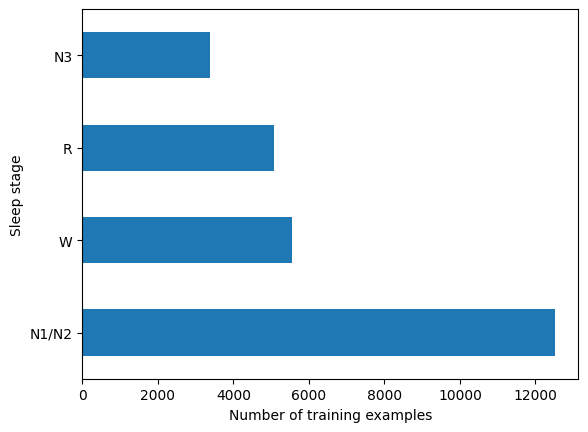

In [49]:
classes_mapping = {0: 'W', 1: 'N1/N2', 2: 'N3', 3: 'R'}
y_train = pd.Series([y for _, y in train_ds]).map(classes_mapping)
ax = y_train.value_counts().plot(kind='barh')
ax.set_xlabel('Number of training examples');
ax.set_ylabel('Sleep stage');

In [50]:
# Computing class weight
from sklearn.utils.class_weight import compute_class_weight

train_y = np.concatenate([ds.epochs_labels for ds in train_ds.datasets])
class_weights = compute_class_weight('balanced', classes=np.unique(train_y), y=train_y)
print(class_weights)

[1.19410917 0.52989847 1.96516454 1.30456603]


In [51]:
from torch import nn


class SleepStagerChambon2018(nn.Module):

    def __init__(self, n_channels, sfreq, n_conv_chs=8, time_conv_size_s=0.5,
                 max_pool_size_s=0.125, n_classes=5, input_size_s=30,
                 dropout=0.25):
        super().__init__()

        time_conv_size = int(time_conv_size_s * sfreq)
        max_pool_size = int(max_pool_size_s * sfreq)
        input_size = int(input_size_s * sfreq)
        pad_size = time_conv_size // 2
        self.n_channels = n_channels
        len_last_layer = self._len_last_layer(
            n_channels, input_size, max_pool_size, n_conv_chs)

        if n_channels > 1:
            self.spatial_conv = nn.Conv2d(1, n_channels, (n_channels, 1))

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                1, n_conv_chs, (1, time_conv_size), padding=(0, pad_size)),
            nn.ReLU(),
            nn.MaxPool2d((1, max_pool_size)),
            nn.Conv2d(
                n_conv_chs, n_conv_chs, (1, time_conv_size),
                padding=(0, pad_size)),
            nn.ReLU(),
            nn.MaxPool2d((1, max_pool_size))
        )
        self.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(len_last_layer, n_classes)
        )

    @staticmethod
    def _len_last_layer(n_channels, input_size, max_pool_size, n_conv_chs):
        return n_channels * (input_size // (max_pool_size ** 2)) * n_conv_chs

    def forward(self, x):

        if self.n_channels > 1:
            x = self.spatial_conv(x)
            x = x.transpose(1, 2)

        x = self.feature_extractor(x)
        return self.fc(x.flatten(start_dim=1))

In [52]:
# hyperperameters
dropout=0.75
lr=1e-3

In [53]:
sfreq = raws[0].info['sfreq']  # Sampling frequency
n_channels = raws[0].info['nchan']  # Number of channels

model = SleepStagerChambon2018(n_channels, sfreq, n_classes=4,dropout=dropout)

In [54]:
model = model.to(device)

In [55]:
from torch.utils.data import DataLoader

# Create dataloaders
train_batch_size = 128  # Important hyperparameter
valid_batch_size = 250  # Can be made as large as what fits in memory; won't impact performance
num_workers = 0  # Number of processes to use for the data loading process; 0 is the main Python process

loader_train = DataLoader(
    train_ds, batch_size=train_batch_size, shuffle=True, num_workers=num_workers)
loader_valid = DataLoader(
    valid_ds, batch_size=valid_batch_size, shuffle=False, num_workers=num_workers)
loader_test = DataLoader(
    test_ds, batch_size=valid_batch_size, shuffle=False, num_workers=num_workers)

In [56]:
# functions to carry out our training and validation loops:
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score

def _do_train(model, loader, optimizer, criterion, device, metric):
    # training loop
    model.train()

    train_loss = np.zeros(len(loader))
    y_pred_all, y_true_all = [], []
    for idx_batch, (batch_x, batch_y) in enumerate(loader):
        optimizer.zero_grad()
        batch_x = batch_x.to(device=device, dtype=torch.float32)
        batch_y = batch_y.to(device=device, dtype=torch.int64)

        output = model(batch_x)
        loss = criterion(output, batch_y)

        loss.backward()
        optimizer.step()

        y_pred_all.append(torch.argmax(output, axis=1).cpu().numpy())
        y_true_all.append(batch_y.cpu().numpy())

        train_loss[idx_batch] = loss.item()

    y_pred = np.concatenate(y_pred_all)
    y_true = np.concatenate(y_true_all)
    perf = metric(y_true, y_pred)

    return np.mean(train_loss), perf


def _validate(model, loader, criterion, device, metric):
    # validation loop
    model.eval()

    val_loss = np.zeros(len(loader))
    y_pred_all, y_true_all = [], []
    with torch.no_grad():
        for idx_batch, (batch_x, batch_y) in enumerate(loader):
            batch_x = batch_x.to(device=device, dtype=torch.float32)
            batch_y = batch_y.to(device=device, dtype=torch.int64)
            output = model.forward(batch_x)

            loss = criterion(output, batch_y)
            val_loss[idx_batch] = loss.item()

            y_pred_all.append(torch.argmax(output, axis=1).cpu().numpy())
            y_true_all.append(batch_y.cpu().numpy())

    y_pred = np.concatenate(y_pred_all)
    y_true = np.concatenate(y_true_all)
    perf = metric(y_true, y_pred)

    return np.mean(val_loss), perf


def train(model, loader_train, loader_valid, optimizer, criterion, n_epochs,
          patience, device, metric=None):

    best_valid_loss = np.inf
    best_model = copy.deepcopy(model)
    waiting = 0
    history = []

    if metric is None:
        metric = balanced_accuracy_score

    print('epoch \t train_loss \t valid_loss \t train_perf \t valid_perf')
    print('-------------------------------------------------------------------')

    for epoch in range(1, n_epochs + 1):
        train_loss, train_perf = _do_train(
            model, loader_train, optimizer, criterion, device, metric=metric)
        valid_loss, valid_perf = _validate(
            model, loader_valid, criterion, device, metric=metric)
        history.append(
            {'epoch': epoch,
             'train_loss': train_loss, 'valid_loss': valid_loss,
             'train_perf': train_perf, 'valid_perf': valid_perf})

        print(f'{epoch} \t {train_loss:0.4f} \t {valid_loss:0.4f} '
              f'\t {train_perf:0.4f} \t {valid_perf:0.4f}')

        # model saving
        if valid_loss < best_valid_loss:
            print(f'best val loss {best_valid_loss:.4f} -> {valid_loss:.4f}')
            best_valid_loss = valid_loss
            best_model = copy.deepcopy(model)
            waiting = 0
        else:
            waiting += 1

        # model early stopping
        if waiting >= patience:
            print(f'Stop training at epoch {epoch}')
            print(f'Best val loss : {best_valid_loss:.4f}')
            break

    return best_model, history

In [57]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=lr, weight_decay=0)
criterion = CrossEntropyLoss(weight=torch.Tensor(class_weights).to(device))

In [58]:
n_epochs =12 #10
patience =12 #10
best_model, history = train(model, loader_train, loader_valid, optimizer, criterion, n_epochs, patience,
                                 device, metric=cohen_kappa_score)

epoch 	 train_loss 	 valid_loss 	 train_perf 	 valid_perf
-------------------------------------------------------------------
1 	 0.8998 	 0.6158 	 0.3764 	 0.5886
best val loss inf -> 0.6158
2 	 0.6026 	 0.5399 	 0.5912 	 0.6319
best val loss 0.6158 -> 0.5399
3 	 0.5393 	 0.4915 	 0.6411 	 0.6761
best val loss 0.5399 -> 0.4915
4 	 0.5095 	 0.4895 	 0.6693 	 0.6378
best val loss 0.4915 -> 0.4895
5 	 0.4893 	 0.5111 	 0.6815 	 0.6105
6 	 0.4780 	 0.4538 	 0.6840 	 0.6612
best val loss 0.4895 -> 0.4538
7 	 0.4753 	 0.4558 	 0.6853 	 0.6675
8 	 0.4634 	 0.4518 	 0.6937 	 0.6792
best val loss 0.4538 -> 0.4518
9 	 0.4636 	 0.4664 	 0.6909 	 0.6719
10 	 0.4613 	 0.4530 	 0.6992 	 0.6627
11 	 0.4551 	 0.4853 	 0.6976 	 0.6495
12 	 0.4434 	 0.4781 	 0.7048 	 0.6613


In [59]:
best_epoch_index = max(range(len(history)), key=lambda i: history[i]['valid_perf'])
best_epoch_info = history[best_epoch_index]
best_epoch_performance = best_epoch_info['valid_perf']

# Print the results
print(f"Best Epoch Index: {best_epoch_index}")
print(f"Best Validation Performance: {best_epoch_performance}")

Best Epoch Index: 7
Best Validation Performance: 0.6791927010210803


In [60]:
# Compute test performance
best_model.eval()

y_pred_all, y_true_all = [], []
for batch_x, batch_y in loader_test:
    batch_x = batch_x.to(device=device, dtype=torch.float32)
    batch_y = batch_y.to(device=device, dtype=torch.int64)
    output = model.forward(batch_x)
    y_pred_all.append(torch.argmax(output, axis=1).cpu().numpy())
    y_true_all.append(batch_y.cpu().numpy())

y_pred = np.concatenate(y_pred_all)
y_true = np.concatenate(y_true_all)
rec_ids = np.concatenate(  # indicates which recording each example comes from
    [[i] * len(ds) for i, ds in enumerate(test_ds.datasets)])

test_bal_acc = balanced_accuracy_score(y_true, y_pred)
test_kappa = cohen_kappa_score(y_true, y_pred)

In [61]:
print(f'Test balanced accuracy: {test_bal_acc:0.3f}')
print(f'Test Cohen\'s kappa: {test_kappa:0.3f}')

Test balanced accuracy: 0.850
Test Cohen's kappa: 0.693


In [62]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(conf_mat, classes_mapping):
    ticks = [key for key in classes_mapping.keys()]
    tick_labels = classes_mapping.values()

    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(conf_mat, cmap='Greens')

    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Confusion matrix')

    for i in range(len(ticks)):
        for j in range(len(ticks)):
            text = ax.text(
                j, i, conf_mat[i, j], ha='center', va='center', color='k')

    fig.colorbar(im, ax=ax, fraction=0.05, label='# examples')
    fig.tight_layout()

    return fig, ax

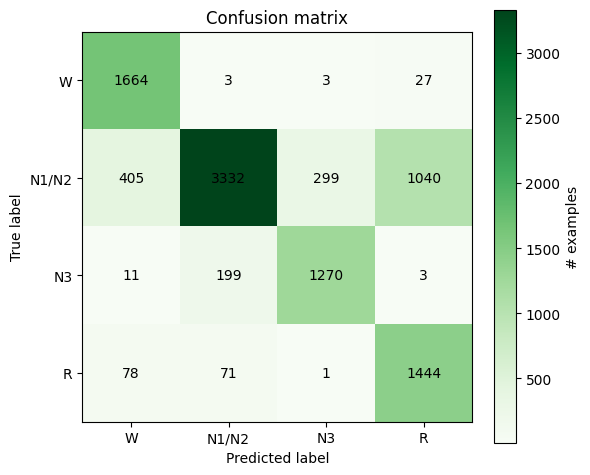

In [63]:
conf_mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat, classes_mapping);

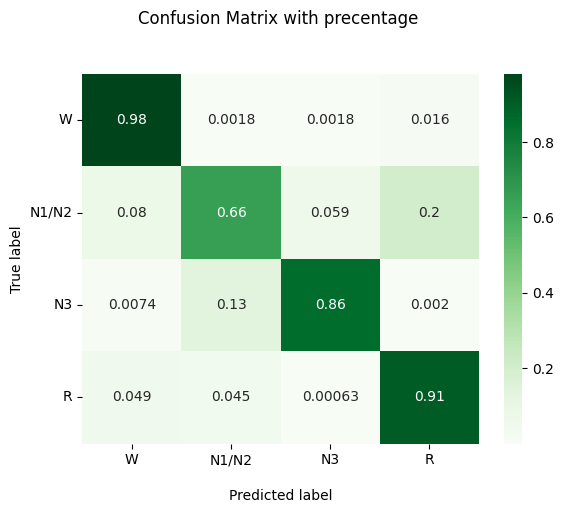

In [64]:
import seaborn as sns
x_axis_labels=["W", "N1/N2", 'N3','R']
y_axis_labels =["W", 'N1/N2', 'N3','R']

ax = sns.heatmap(conf_mat/conf_mat.sum(axis=1)[:, np.newaxis], annot=True,  cmap='Greens',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10)
ax.set_title('Confusion Matrix with precentage \n\n');
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label');

## Display the visualization of the Confusion Matrix.
plt.show()

In [65]:
from sklearn import metrics
target_names = ['W', 'N1/N2', 'N3','R']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           W       0.77      0.98      0.86      1697
       N1/N2       0.92      0.66      0.77      5076
          N3       0.81      0.86      0.83      1483
           R       0.57      0.91      0.70      1594

    accuracy                           0.78      9850
   macro avg       0.77      0.85      0.79      9850
weighted avg       0.82      0.78      0.78      9850



In [66]:
y_pred = np.concatenate(y_pred_all)
y_true = np.concatenate(y_true_all)

In [69]:
# print("\nPrediction: " + y_pred[0])
# print("\nTrue: " + y_true[0])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
print(y_true)

[0 0 0 ... 0 0 0]


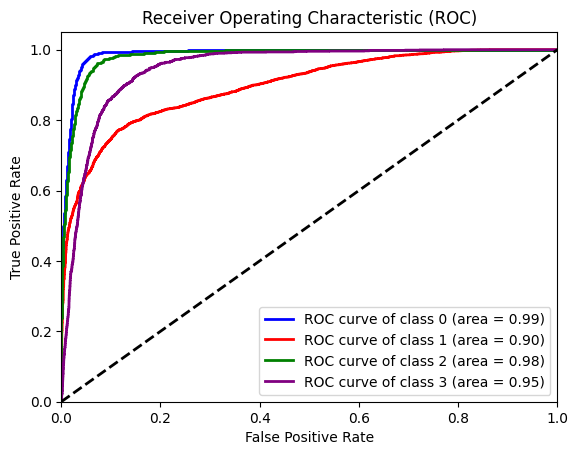

In [73]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer


model.eval()  # Set model to evaluation mode

softmax = nn.Softmax(dim=1)
y_true_list = []
y_pred_probs_list = []

with torch.no_grad():
    for batch_x, batch_y in loader_test:
        batch_x = batch_x.to(device=device, dtype=torch.float32)
        output = softmax(model.forward(batch_x)).cpu().numpy()  # Get probability predictions
        y_pred_probs_list.append(output)
        y_true_list.append(batch_y.cpu().numpy())

y_pred_probs = np.concatenate(y_pred_probs_list, axis=0)
y_true = np.concatenate(y_true_list, axis=0)

# Binarize the true labels (y_true) for all classes
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)  # Transform multi-class labels to binary labels

# Calculate the ROC curve and ROC area for each class
n_classes = y_true_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [74]:
from sklearn.metrics import roc_auc_score
# Assuming y_true and y_pred_probs are already defined and contain true labels and prediction probabilities respectively

n_classes = y_true_bin.shape[1]

# Binarize the output labels
y_true_binarized = LabelBinarizer().fit_transform(y_true)

# Calculate AUC for each class and print
for i in range(n_classes):
    class_auc = roc_auc_score(y_true_binarized[:, i], y_pred_probs[:, i])
    print(f"Class {i} AUC: {class_auc:.3f}")

# Calculate and print micro-average AUC score across all classes
micro_avg_auc = roc_auc_score(y_true_binarized, y_pred_probs, average="micro")
print(f"Micro-average AUC: {micro_avg_auc:.3f}")

# Calculate and print macro-average AUC score across all classes
macro_avg_auc = roc_auc_score(y_true_binarized, y_pred_probs, average="macro")
print(f"Macro-average AUC: {macro_avg_auc:.3f}")


Class 0 AUC: 0.988
Class 1 AUC: 0.897
Class 2 AUC: 0.982
Class 3 AUC: 0.946
Micro-average AUC: 0.952
Macro-average AUC: 0.953


In [75]:
import torch.nn.functional as F

def evaluate_model(model, loader, device):
    model.eval()  # Set model to evaluation mode
    true_labels = []
    predictions = []
    with torch.no_grad():  # No need to track gradients
        for batch_x, batch_y in loader:
            batch_x = batch_x.to(device=device, dtype=torch.float32)
            output = model(batch_x)
            probs = F.softmax(output, dim=1)  # Convert logits to probabilities
            predictions.append(probs.cpu().numpy())
            true_labels.append(batch_y.cpu().numpy())

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)
    return true_labels, predictions

# After training your model, evaluate it to get true labels and predicted probabilities
y_true, y_pred_probs = evaluate_model(best_model, loader_test, device)


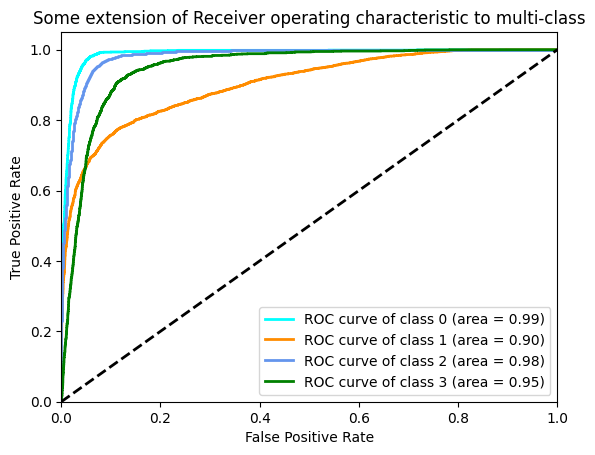

In [76]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

def plot_multiclass_roc_auc(y_true, y_score, n_classes):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Call the plotting function with the number of classes
plot_multiclass_roc_auc(y_true, y_pred_probs, n_classes=4)


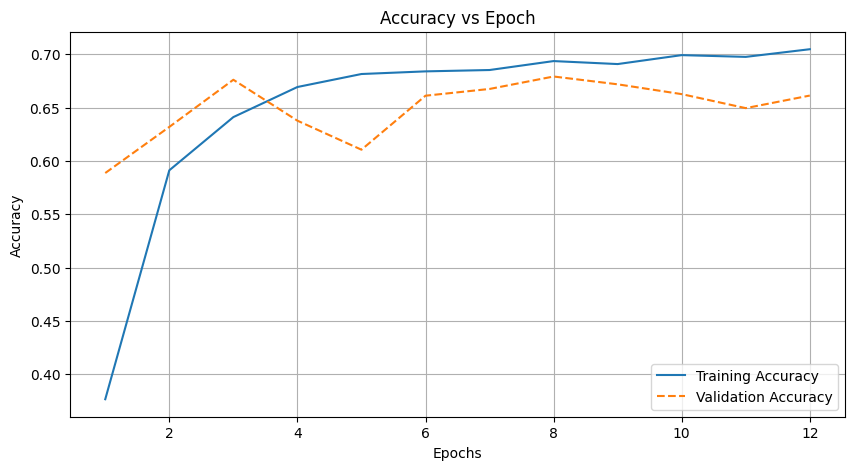

In [77]:
import matplotlib.pyplot as plt

# Extracting training and validation performance
epochs = [x['epoch'] for x in history]
train_perfs = [x['train_perf'] for x in history]
valid_perfs = [x['valid_perf'] for x in history]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_perfs, label='Training Accuracy')
plt.plot(epochs, valid_perfs, label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Adjust this label if you are using a metric other than accuracy
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


1 	 0.4434 	 0.4243 	 0.7019 	 0.6963
2 	 0.4457 	 0.4344 	 0.7057 	 0.6989
3 	 0.4395 	 0.4250 	 0.7068 	 0.7008
4 	 0.4398 	 0.4493 	 0.7103 	 0.6683
5 	 0.4359 	 0.4363 	 0.7136 	 0.6738
6 	 0.4270 	 0.4314 	 0.7140 	 0.6896
7 	 0.4260 	 0.4309 	 0.7166 	 0.7045
8 	 0.4339 	 0.4180 	 0.7148 	 0.7019
9 	 0.4170 	 0.4027 	 0.7205 	 0.7178
10 	 0.4221 	 0.4129 	 0.7163 	 0.7184
11 	 0.4169 	 0.3997 	 0.7269 	 0.7221
12 	 0.4182 	 0.4161 	 0.7216 	 0.6953


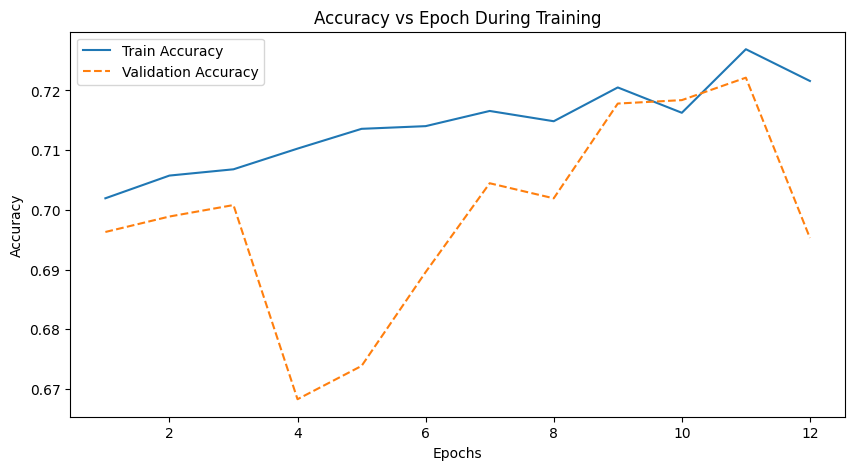

In [78]:
import matplotlib.pyplot as plt

def train_and_plot(model, loader_train, loader_valid, optimizer, criterion, n_epochs, patience, device, metric=None):
    best_valid_loss = np.inf
    best_model = copy.deepcopy(model)
    waiting = 0
    history = []

    if metric is None:
        metric = balanced_accuracy_score

    for epoch in range(1, n_epochs + 1):
        train_loss, train_perf = _do_train(
            model, loader_train, optimizer, criterion, device, metric=metric)
        valid_loss, valid_perf = _validate(
            model, loader_valid, criterion, device, metric=metric)
        history.append({
            'epoch': epoch,
            'train_loss': train_loss, 'valid_loss': valid_loss,
            'train_perf': train_perf, 'valid_perf': valid_perf})

        print(f'{epoch} \t {train_loss:.4f} \t {valid_loss:.4f} \t {train_perf:.4f} \t {valid_perf:.4f}')

        # Model improvement check
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            best_model = copy.deepcopy(model)
            waiting = 0
        else:
            waiting += 1

        # Early stopping check
        if waiting >= patience:
            print(f'Stop training at epoch {epoch}')
            print(f'Best val loss: {best_valid_loss:.4f}')
            break

    # Accuracy vs Epoch Plot
    epochs = [x['epoch'] for x in history]
    train_accs = [x['train_perf'] for x in history]
    valid_accs = [x['valid_perf'] for x in history]

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accs, label='Train Accuracy')
    plt.plot(epochs, valid_accs, label='Validation Accuracy', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')  # Update this if you use metrics other than accuracy
    plt.title('Accuracy vs Epoch During Training')
    plt.legend()
    plt.show()

    return best_model, history

# Update model training call
best_model, training_history = train_and_plot(model, loader_train, loader_valid, optimizer, criterion, n_epochs, patience, device, metric=cohen_kappa_score)



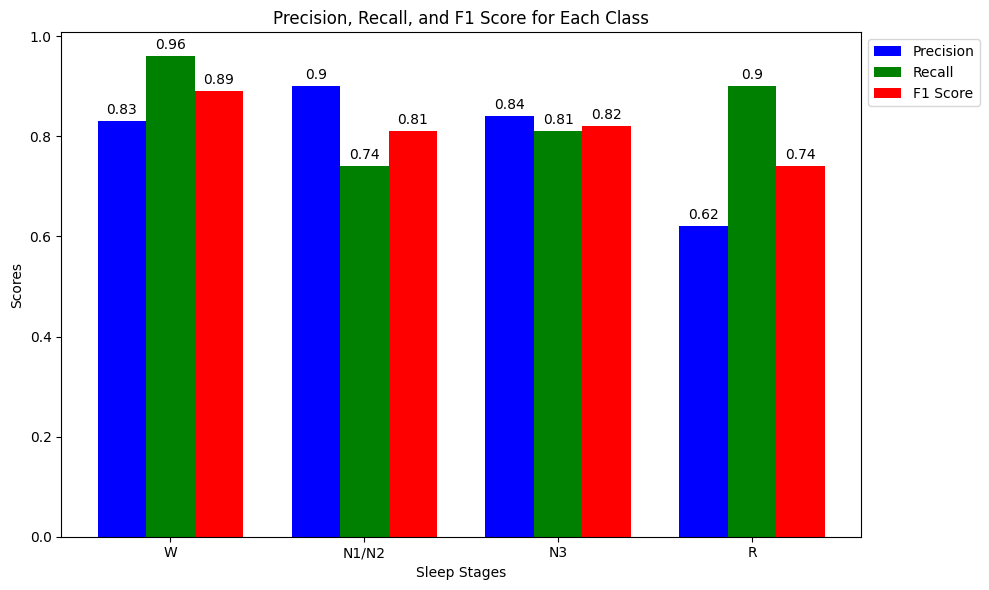

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Extracted values from your classification report
precision = [0.83, 0.9, 0.84, 0.62]
recall = [0.96, 0.74, 0.81, 0.9]
f1_score = [0.89, 0.81, 0.82, 0.74]
classes = ['W', 'N1/N2', 'N3', 'R']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(classes))

# Plot bars for each metric
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='b')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='g')
bar3 = ax.bar(index + 2*bar_width, f1_score, bar_width, label='F1 Score', color='r')

# Add aesthetics
ax.set_xlabel('Sleep Stages')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score for Each Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)

# Change legend location to right outside the chart
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# Helper function to attach a text label above each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()


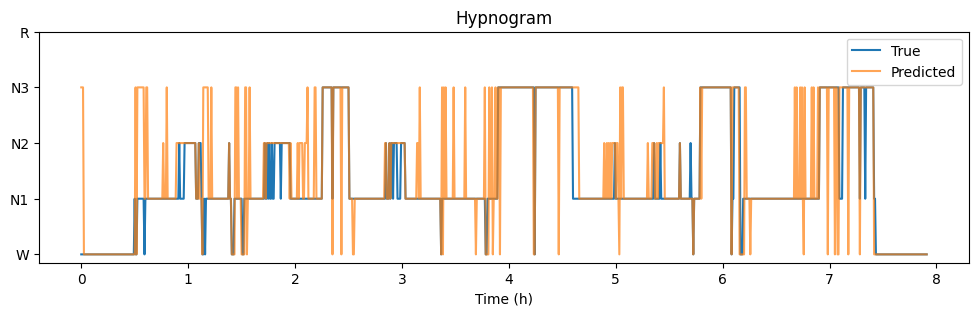

In [80]:
# Plot hypnogram for one recording

mask = rec_ids == 3  # pick a recording number

t = np.arange(len(y_true[mask])) * 30 / 3600

fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(t, y_true[mask], label='True')
ax.plot(t, y_pred[mask], alpha=0.7, label='Predicted')
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(['W', 'N1', 'N2', 'N3', 'R'])
ax.set_xlabel('Time (h)')
ax.set_title('Hypnogram')
ax.legend();

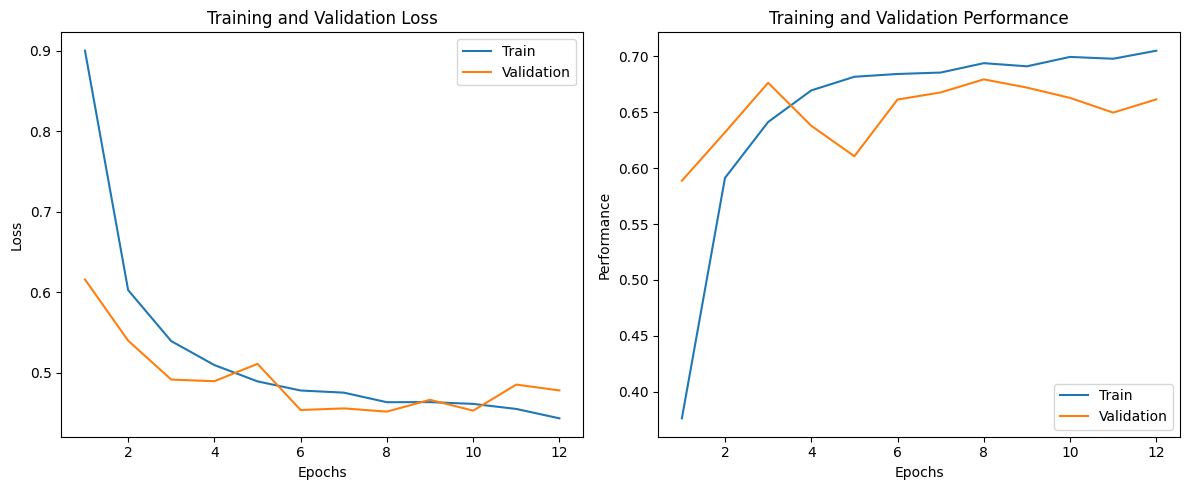

In [81]:
import matplotlib.pyplot as plt

# Extract history information
epochs = [entry['epoch'] for entry in history]
train_losses = [entry['train_loss'] for entry in history]
valid_losses = [entry['valid_loss'] for entry in history]
train_perfs = [entry['train_perf'] for entry in history]
valid_perfs = [entry['valid_perf'] for entry in history]

# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train')
plt.plot(epochs, valid_losses, label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Performance plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_perfs, label='Train')
plt.plot(epochs, valid_perfs, label='Validation')
plt.title('Training and Validation Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Add this code after computing y_true and y_pred
import random

# Randomly select indices for visualization
sample_indices = random.sample(range(len(y_true)), min(5, len(y_true)))

# Visualize predicted vs true labels
for idx in sample_indices:
    print(f"Example {idx + 1} - True: {classes_mapping[y_true[idx]]}, Predicted: {classes_mapping[y_pred[idx]]}")


In [ ]:
#Stpring physionet-sleep-data in google frive

In [83]:
!pip install pydrive

In [84]:
import shutil
import os

def save_data_locally(fnames, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)

    for psg_path, hypnogram_path in fnames:
        # Define new local paths
        local_psg_path = os.path.join(local_dir, os.path.basename(psg_path))
        local_hypnogram_path = os.path.join(local_dir, os.path.basename(hypnogram_path))

        # Copy files to local directory
        shutil.copy(psg_path, local_psg_path)
        shutil.copy(hypnogram_path, local_hypnogram_path)


In [85]:
local_directory = '/Users/om-college/DataScience/Others/Data'  # Change this to your local path
save_data_locally(fnames, local_directory)

In [86]:
source_dir = '/root/mne_data/physionet-sleep-data/'
zip_file_path = '/root/mne_data/sleep_data.zip'

shutil.make_archive('/root/mne_data/sleep_data', 'zip', source_dir)

'/root/mne_data/sleep_data.zip'

In [94]:
from google.colab import files

# Check if the file was created
if os.path.exists(zip_file_path):
    print(f"File created successfully at: {zip_file_path}")
    # Download the zip file
    files.download(zip_file_path)
else:
    print("File not found. Please check the path.")

File created successfully at: /root/mne_data/sleep_data.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
!cd /root/mne_data/physionet-sleep-data/

In [89]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.137.0
    Uninstalling google-api-python-client-2.137.0:
      Successfully uninstalled google-api-python-client-2.137.0


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Define the destination path in Google Drive
destination_dir = '/content/drive/MyDrive/sleepData'

os.makedirs(destination_dir, exist_ok=True)
shutil.copy(zip_file_path, destination_dir)

'/content/drive/MyDrive/sleepData/sleep_data.zip'

In [99]:
zip_file_size = os.path.getsize(zip_file_path)
zip_file_size_mb = zip_file_size / (1024 * 1024 * 1024)

print(f"Size of the zip file: {zip_file_size} bytes")
print(f"Size of the zip file: {zip_file_size_mb:.4f} GB")

Size of the zip file: 5249974296 bytes
Size of the zip file: 4.8894 GB
